**Import libraries**

In [91]:
"""
Neural Networks (Dr. Shakeri)
Project 1 (TA):
    - Implementing Perceptron
Student Name and ID: Pouria Alimoradpor 9912035
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

1. Using make_blobs from sklearn.datasets to generate random data points which is linearly separable.
Each column of X represents a feature and each row represents a data point. y is the label of each data point.

In [92]:
X, Y = make_blobs(n_samples=100, n_features=10, centers=2, random_state=41)

print(X.shape, Y.shape)

(100, 10) (100,)


2. Define class F which methods of this class belong to the class and must be defined statically.

In [93]:
class F:
    @staticmethod
    def sign(x):
        # Implement the sign activation function
        return +1 if x >= 0 else -1
    
    @staticmethod
    def step(x):
        # Implement the step activation function
        return 1 if x >= 0 else 0
    
    @staticmethod
    def sigmoid(x):
        # Implement the sigmoid activation function
        return 1 / (1 + np.exp(-x))
    
    @staticmethod
    def tanh(x):
        # Implement the tanh activation function
        return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
    
    @staticmethod
    def relu(x):
        # Implement the relu activation function
        return max(0, x)
    
    @staticmethod
    def leaky_relu(x, alpha=0.01):
        # Implement the leaky relu activation function
        return max(alpha * x, x)
    
    @staticmethod
    def elu(x, alpha=0.01):
        # Implement the elu activation function
        return x if x > 0 else alpha * (np.exp(x) - 1)
    
    @staticmethod
    def softplus(x):
        # Implement the softplus activation function
        return np.log(1 + np.exp(x))
    
    @staticmethod
    def softmax(x):
        # Implement the softmax activation function
        return np.exp(x) / np.sum(np.exp(x))
    
    @staticmethod
    def linear(x):
        # Implement the linear activation function
        return x

3. Define class Perceptron which is a simple linear classifier. It contains Waights and Bias. The output will be calculated by the dot product of the input and the weights plus the bias in forward function.

In [94]:
class Perceptron:
    def __init__(self, input_size, neurons_size=1, activation=F.sign):
        # Initialize the weights and biases of the new model
        self.W = np.random.rand(neurons_size, input_size)
        self.b = np.random.rand(neurons_size, 1)
        self.activation = activation
    
    def forward(self, input):
        # Feed input features to your model and return output
        self.inputs = input
        self.output = self.activation(np.dot(self.W, input) + self.b)
        return self.output

4. Define class Optimizer which should optimize the weights and bias of the Perceptron. 

In [95]:
class Optimizer:
    def __init__(self, model):
        # Initialize the optimizer with the model
        self.model = model

    def update(self, x, y, y_hat):
        # Update weight and bias of the model
        self.model.W += (y - y_hat) * x
        self.model.b += (y - y_hat)

5. Define model object which is instance of Perceptron class. (parameters are initialized by part 1.)
6. Define optimizer object which is instance of Optimizer class and let it optimize the model.

In [96]:
model = Perceptron(X.shape[1])
optimizer = Optimizer(model)

n_iter = 1000
for _ in range(n_iter):
    for x, y in zip(X, Y):
        y_hat = model.forward(x)
        optimizer.update(x, y, y_hat)

7. Use above functions for 2_featured dataset and plot the decision boundary.

In [97]:
X, Y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=41)

model = Perceptron(X.shape[1])
optimizer = Optimizer(model)
n_iter = 1000
for _ in range(n_iter):
    for x, y in zip(X, Y):
        y_hat = model.forward(x)
        optimizer.update(x, y, y_hat)

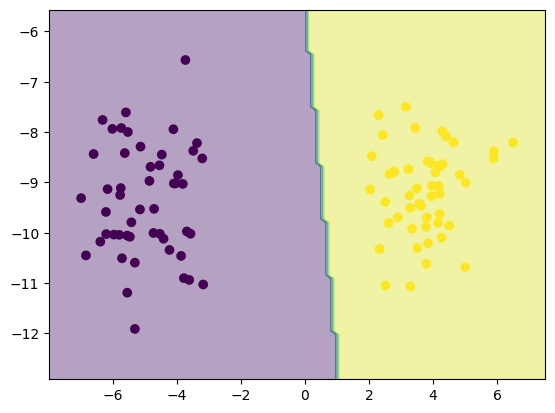

In [102]:
x1 = np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100)
x2 = np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        Z[i, j] = model.forward([X1[i, j], X2[i, j]])
plt.contourf(X1, X2, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()